# Allgemeine Relativitätstheorie mit dem Computer 
# (General Theory of Relativity on the Computer)

## Vorlesung gehalten an der 
## J.W.Goethe-Universität in Frankfurt am Main 
## (Sommersemester 2020)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 15.05.2020


## Erster Vorlesungsteil: Allgemeine Relativitätstheorie mit Python


## Bewegung eines Probekörpers um ein schwarzes Loch in der Ebene

Im folgenden wird die Geodätengleichung in vorgegebener Schwarzschild Raumzeit betrachtet. Die Geodätengleichung beschreibt wie sich ein Probekörper (Masse = 0) im Raum bewegt und sagt voraus, dass diese Bewegung sich stehts entlang der kürzesten Kurve, in der durch die Metrik beschriebenen gekrümmten Raumzeit, vollzieht. Zunächst wird das Python Packet "GraviPy" eingebunden, welches auf dem Packet SymPy basiert und symbolische Berechnungen in der Allgemeinen Relativitätstheorie relativ einfach möglich macht.

In [2]:
from gravipy.tensorial import * 
import sympy as sym
import inspect
import numpy as np
import math
sym.init_printing()

Definition der Koordinaten und der kovarianten Raumzeit-Metrik der Schwarzschildmetrik:
$$ g_{\mu\nu}=\left( \begin{array}{cccc} 1-\frac{2\,M}{r} & 0 & 0 & 0\\ 0&  -\frac{1}{1-\frac{2\,M}{r}}&  0&0 \\ 0&  0&  -r^2& 0\\ 0&  0&  0& -r^2 \hbox{sin}^2(\theta)\end{array} \right)$$


In [3]:
# define some symbolic variables
t, r, theta, phi, M = symbols('t, r, \\theta, \phi, M')
# create a coordinate four-vector object instantiating 
# the Coordinates class
x = Coordinates('x', [t, r, theta, phi])
# define a matrix of a metric tensor components
Metric = diag((1-2*M/r), -1/(1-2*M/r), -r**2, -r**2*sin(theta)**2)
#Metric = diag(A, -B, -r**2, -r**2*sin(theta)**2)
# create a metric tensor object instantiating the MetricTensor class
g = MetricTensor('g', x, Metric)

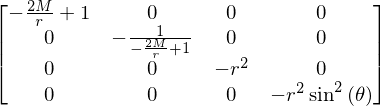

In [4]:
g(All, All)

Kontravariante Form der Metrik ($ g^{\mu\nu}$)

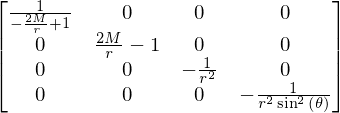

In [5]:
g(-All, -All)

Die Chistoffel Symbole in (kontravarianter Form): 
$$ \Gamma_{\rho \mu \nu} = g_{\rho \sigma}\Gamma^{\sigma}_{\ \mu \nu} = \frac{1}{2}(g_{\rho \mu| \nu} + g_{\rho \nu| \mu} - g_{\mu \nu| \rho})$$

Hier speziell $$ \Gamma_{2 2 2} = \Gamma_{r r r}$$

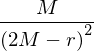

In [6]:
Ga = Christoffel('Ga', g)
Ga(2, 2, 2)

Der Riemann Tensor:
$$ R_{\mu \nu \rho \sigma} = \frac{\partial \Gamma_{\mu \nu \sigma}}{\partial x^{\rho}} - \frac{\partial \Gamma_{\mu \nu \rho}}{\partial x^{\sigma}} + \Gamma^{\alpha}_{\ \nu \sigma}\Gamma_{\mu \rho \alpha} - \Gamma^{\alpha}_{\ \nu \rho}\Gamma_{\mu \sigma \alpha} - \frac{\partial g_{\mu \alpha}}{\partial x^{\rho}}\Gamma^{\alpha}_{\ \nu \sigma} + \frac{\partial g_{\mu \alpha}}{\partial x^{\sigma}}\Gamma^{\alpha}_{\ \nu \rho} $$

Hier speziell $$ R_{1 3 1 3} =  R_{t \theta t \theta} $$

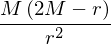

In [7]:
Rm = Riemann('Rm', g)
Rm(1,3,1,3)

Oder in gemischt kontra- kovarianter Form $$ R^{1}{}_{3 1 3} = R^{t}{}_{\theta t \theta}  $$

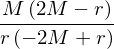

In [8]:
Rm(-1,3,1,3)

Der Ricci Tensor:

$$ R_{\mu \nu} = \frac{\partial \Gamma^{\sigma}_{\ \mu \nu}}{\partial x^{\sigma}} - \frac{\partial \Gamma^{\sigma}_{\ \mu \sigma}}{\partial x^{\nu}} + \Gamma^{\sigma}_{\ \mu \nu}\Gamma^{\rho}_{\ \sigma \rho} - \Gamma^{\rho}_{\ \mu \sigma}\Gamma^{\sigma}_{\ \nu \rho} $$

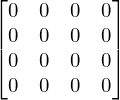

In [9]:
Ri = Ricci('Ri', g)
Ri(All, All)

Der Ricci Tensor lässt sich auch durch folgende Kontraktion aus dem Riemann Tensor berechnen:
$R_{\mu \nu} = R^{\rho}_{\ \mu \rho \nu} $

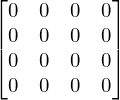

In [10]:
ricci = sum([Rm(i, All, k, All)*g(-i, -k)
             for i, k in list(variations(range(1, 5), 2, True))],
            zeros(4))
ricci.simplify()
ricci

Der Ricci Skalar ergibt sich aus der Kontraktion des Ricci Tensors: $R = R_{\mu}^{\ \mu} = g^{\mu \nu}R_{\mu \nu}$

In [11]:
Ri.scalar()

Der Einstein Tensor:$$ G_{\mu \nu} = R_{\mu \nu} - \frac{1}{2}g_{\mu \nu}R $$

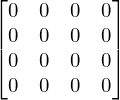

In [12]:
G = Einstein('G', Ri)
G(All, All)

### Geodätische Bewegung eines Probekörpers

Die Geodätengleichunglässt sich durch folgendes Variationsprinzip herleiten:
$$\int_A^B ds= \int_A^B \sqrt{g_{\mu\nu} dx^\mu dx^\nu}=\int_A^B \sqrt{g_{\mu\nu} \frac{dx^\mu}{d\lambda} \frac{dx^\nu}{d\lambda}} d\lambda \rightarrow \hbox{Extremal}$$
, wobei sich dann die Geod&auml;tengleichung mittels der Euler-Lagrange Gleichungen 
$L = \sqrt{g_{\mu\nu} \frac{dx^\mu}{d\lambda} \frac{dx^\nu}{d\lambda}}$, bzw. 
 alternativ $L = g_{\mu\nu} \frac{dx^\mu}{d\lambda} \frac{dx^\nu}{d\lambda}$ ergibt:
$$
\frac{d}{d\lambda} \left( \frac{\partial L}{\partial \frac{\partial x^\mu}{\partial \lambda}} \right) - 
    \frac{\partial L}{\partial x^\mu} = 0 \quad \rightarrow \quad \frac{d^2 x^\mu}{d\lambda^2} +  
    \Gamma^\mu_{\nu \rho} \frac{d x^\nu}{d\lambda} \frac{d x^\rho}{d\lambda} ~=~ 0 
$$
$\Gamma^\mu_{\nu \rho}$ sind die Christoffel Symbole zweiter Art und $\lambda$ ein affiner Parameter 
(z.B. die Eigenzeit $\tau$ des Probekörpers). Die Geodätengleichung ist ein System gekoppelter Differentialgleichungen und sie lässt sich in Python mit der Funktion ''Geodesic'' berechnen (in vollständig kovarianter Form): 

$$ \frac{d^2x_\mu}{d\tau^2} + \Gamma_{\rho \sigma \mu} \frac{dx^{\rho}}{d\tau}\frac{dx^{\sigma}}{d\tau} =0$$

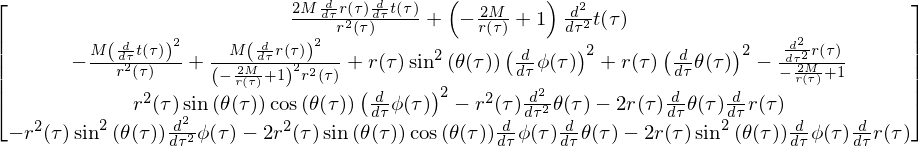

In [13]:
tau = Symbol('\\tau')
w = Geodesic('w', g, tau)
w(All).transpose()

Die definierte Python-Klasse '_Geodesic_' setzt die Koordinaten automatisch in einen Parametrisierungsmodus (Parametrisierung der Koordinaten nach dem affinen Parameter $\tau$). 

In [14]:
Parametrization.info()

In [15]:
x(-All)

Diese Parametrisierung kann man mit dem folgenden Befehl wieder abstellen:

In [16]:
#Parametrization.deactivate(x)

Wir lassen nur ebene Bewegungen zu ($\theta=\frac{\pi}{2}, \frac{d \theta}{d\tau}=0, \frac{d^2 \theta}{d\tau^2}=0$).

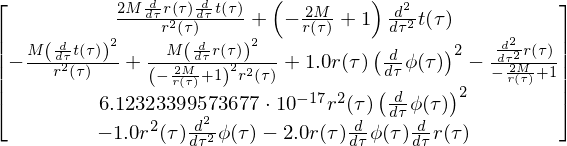

In [17]:
DGL = w(All).subs([(x(-3).diff(tau,tau),0),(x(-3).diff(tau),0),(x(-3),math.pi/2)]).transpose()
DGL

Zusätzlich kann man sich auf den radial in das schwarze Loch einfallenden Probekörper beschränken ($\frac{d \phi}{d\tau}=0, \frac{d^2 \phi}{d\tau^2}=0$).

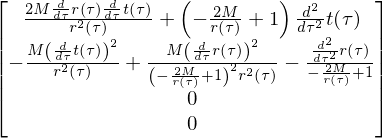

In [18]:
DGL1 = DGL.subs([(x(-4).diff(tau,tau),0),(x(-4).diff(tau),0)])
DGL1

Dieses System von Differentialgleichungen ist zweiter Ordnung in der Eigenzeit $\tau$ muss nun gelösst werden. Zunächst eine kurze Zusammenfassung: Lösen von Differentialgleichungen in Python

#### Lösen von Differentialgleichungen in Python

In Python kann man Differentialgleichungen z.B. mit dem Befehl dsolve lösen (falls eine analytische Lösung existiert). Hier ein einfaches Beispiel:

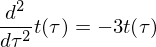

In [19]:
BeispielDGL1=sym.Eq(x(-1).diff(tau,tau), -3*x(-1))
BeispielDGL1

 Lösung ohne Anfangsbedingungen:

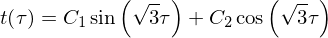

In [20]:
sym.dsolve(BeispielDGL1)

Lösung mit Anfangsbedingungen:

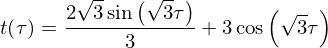

In [21]:
LoesAnalytic = sym.dsolve(BeispielDGL1,x(-1),ics={x(-1).subs(tau,0):3,x(-1).diff(tau).subs(tau, 0): 2})
LoesAnalytic

Diese Lösung kann man sich z.B. wie folgt darstellen:

In [22]:
import matplotlib.pyplot as plt 
import matplotlib

tauvals = np.linspace(0, 10, 1000)
func = sym.lambdify(tau, LoesAnalytic.rhs)
plt.plot(tauvals,func(tauvals),color='blue', linewidth=1, linestyle='-')

Manchmal existiert keine analytische Lösung für die vorliegende Differentialgleichungen. In Python kann man Differentialgleichungen z.B. mit dem Befehl "solve_ivp" lösen. Wir demonstrieren die Vorgehensweise zunächst an dem folgenden Beispiel eines Systems von Differntialgleichungen, welches eine Kreisbahn beschreibt:

$$  \frac{d}{dt}\vec{r} =
\left(
\begin{array}[c]{c}
\frac{dy_0(t)}{dt}\\
\frac{dy_1(t)}{dt}
\end{array}
\right)
=
\left(
\begin{array}[c]{c}
{\rm cos}(y_1(t))\\
{\rm sin}(y_0(t))
\end{array}
\right)
$$

Zunächst importieren wir scipy, definieren unser Systems von Differntialgleichungen und lösen dieses dann mit den Anfangswerten $\vec{r}(t=0)=[y_1(t=0)=0, y_2(t=0)=1]$ im Bereich $t \in [0,6]$ mit 100 Punkten:

In [23]:
from scipy.integrate import solve_ivp

In [30]:
tspan=np.linspace(0,6,100)
def f(t, r):
    y0, y1 = r
    dy0dt = np.cos(y1)
    dy1dt = np.sin(y0)
    return dy0dt, dy1dt
sol = solve_ivp(f, (0,6), (0,1), t_eval=tspan)

Die Lösung können wir uns grafisch als zeitliche Funktionen von $y_0$ und $y_1$ darstellen

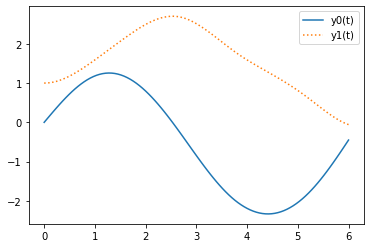

In [27]:
plt.clf()
fig, ax = plt.subplots(num=1)
ax.plot(tspan, sol.y[0], '-', label='y0(t)')
ax.plot(tspan, sol.y[1], ':', label='y1(t)')
ax.legend(loc='best')
plt.show()

... oder als Raumkurve $\vec{r}(t)$ in einem $y_0$-$y_1$ Diagram darstellen:

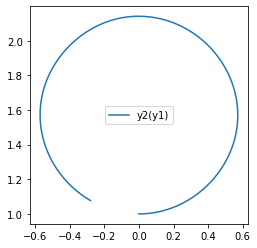

In [25]:
plt.clf()
fig, ax = plt.subplots(num=1)
ax.plot(sol.y[0], sol.y[1], '-', label='y2(y1)')
ax.legend(loc='center')
plt.axis("scaled")
plt.show()

#### Lösen der Geodätengleichung in Python

Um das der Geodätengleichung zugrundeliegende System von Differentialgleichungen zweiter Ordnung in Python zu lösen, muss man es zunächst in ein System erster Ordnung umschreiben und es dann dannach mit solve_ivp lösen -> Hausaufgabe!